# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from lin_reg import best_line
from scipy import stats
import seaborn as sns
%matplotlib inline

Slides [here](https://docs.google.com/presentation/d/1DwCvkgzA0PmdwZJAqD82QJnwcR_AnGcFM74s5QxpDkQ/edit?usp=sharing).

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:

## Covariance

For two random variables $X$ and $Y$, each with $n$ values:

$\Large\sigma_{XY} = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{n}$ <br/>

In [ ]:
X = [1, 3, 5]
Y = [2, 9, 10]

# Covariance by hand:
((1-3) * (2-7) + (3-3) * (9-7) + (5-3) * (10-7)) / 3

In [ ]:
# Better yet: With NumPy:
np.cov(X, Y, ddof=0)[0, 1]

In [ ]:
np.cov(X, Y, ddof=0)

Note that the value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is wanted is a _standardized_ scale for covariance, hence: _correlation_.

## Correlation

Pearson Correlation:<br/>$\Large r_P = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i = 1}(x_i - \mu_x)^2\Sigma^n_{i = 1}(y_i -\mu_y)^2}}$

Note that we are simply standardizing the covariance by the standard deviations of X and Y (the ($n-1$)'s cancel!).

$\bf{Check}$:

<details><summary>
What happens if X = Y?
</summary>
Then numerator = denominator and the correlation = 1!
</details>
<br/>
We'll always have $-1 \leq r \leq 1$. (This was the point of standardizing by the standard deviations of X and Y.)

A correlation of -1 means that X and Y are perfectly negatively correlated, and a correlation of 1 means that X and Y are perfectly positively correlated.

NumPy also has a correlation method:

In [ ]:
np.corrcoef(X, Y)

In [ ]:
np.corrcoef(X, Y)[0, 1] == (np.cov(X, Y, ddof=0) / (np.std(X) * np.std(Y)))[0, 1]

## Causation

_Why_ does it happen that variables correlate? It _may_ be that one is the cause of the other. A city having a high population, for example, probably does have some causal effect on the number of buses that the city has. But this _need not_ be the case, and that is why statisticians are fond of saying that 'correlation is not causation'. An alternative possibility, for example, is that high values of X and Y are _both_ caused by high values of some third factor Z. The size of children's feet, for example, is correlated with their ability to spell, but this is of course NOT because either is a cause of the other. Rather, BOTH are caused by the natural maturing and development of children. As they get older, both their feet and their spelling abilities grow!

## Statistical Learning Theory

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a _function_ of the independent variable(s).

This is the proper interpretation of a statistical _model_.

Simple idea: We can model correlation with a _line_. As one variable changes, so does the other.

This model has two *parameters*: *slope* and *y-intercept*.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will  be some sort of **error** or **loss** or **residual**. The best-fit line is constructed by minimizing the sum of the squares of these losses.

## Simple Linear Regression

The solution for a simple regression best-fit line is as follows:

- slope: <br/>$\Large m = r_P\frac{\sigma_y}{\sigma_x}$

- y-intercept:<br/> $\Large b = \mu_y - m\mu_x$

Note: The proof of this proceeds by setting the gradient of the loss function equal to 0.

## Assumptions of Linear Regression:

**1. The relationship between target and predictor(s) is linear. (Of course!)**

**How can I check for this?**
- Build a scatterplot of y vs. various predictors.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.
- Consider a different type of model!

**2. The errors are mutually independent. (That is, there is no correlation between any two errors.)**

**How can I check for this?**
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.

**3. The errors are normally distributed. (That is, smaller errors are more probable than larger errors, according to the familiar bell curve.)**

**How can I check for this?**
- Check the Omnibus value (see below).
- Check the Jarque-Bera value (see below).
- Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.

**4. The errors are homoskedastic. (That is, the errors have the same variance. The Greek word $\sigma\kappa\epsilon\delta\acute{\alpha}\nu\nu\upsilon\mu\iota$ means "to scatter".)**

**How can I check for this?**
- Check the Durbin-Watson score (see below).
- Conduct a Goldfeld-Quandt test.
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.
- Consider log-scaling your target.
- Consider a different type of model!

There is no general requirement that the predictors and the target *themselves* be normally distributed. However: Linear regression can work better if the predictors and target are normally distributed. Log-scaling can be a good tool to make data more normal.

Suppose e.g. a kde plot of one of my predictors $X_1$ looks like this:

![original](skewplot.png)

In that case the kde plot of $log(X_1)$ looks like this:

![log](logplot.png)

[Here](https://www.statisticssolutions.com/assumptions-of-linear-regression/) is a helpful resource on the assumptions of linear regression.

Experiment: [Playing with regression line](https://www.desmos.com/calculator/jwquvmikhr) <br/>
Limitations: [Anscombe's Quartet](https://www.desmos.com/calculator/paknt6oneh)

In [ ]:
# Using best_line

best_line(X, Y)

## Multiple Linear Regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

I want to focus here more on what coding a multiple regression looks like in Python. But you might be wondering: Is it possible to calculate the betas by hand?

Yes! See [here](https://stattrek.com/multiple-regression/regression-coefficients.aspx) for a nice explanation and example.

We'll focus more directly on matrix mathematics later in the course.

## Confounding Variables

Suppose I have a simple linear regression that models the growth of corn plants as a function of the temperature of the ambient air. And suppose there is a noticeable positive correlation between temperature and plant height.

In [2]:
corn = pd.read_csv('data/corn.csv')

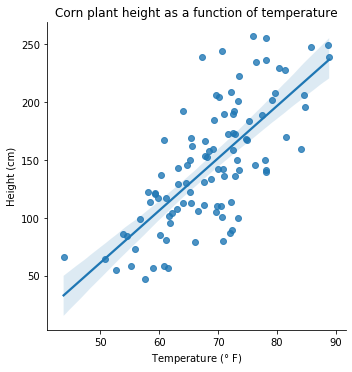

In [10]:
sns.lmplot(data=corn, x='temp', y='height')
plt.xlabel('Temperature ($\degree$ F)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of temperature');

It seems that higher temperatures lead to taller corn plants. But it's hard to know for sure. One **confounding variable** might be *humidity*. If we haven't controlled for humidity, then it's difficult to draw conclusions.

One solution is to use **both features** in a single model.

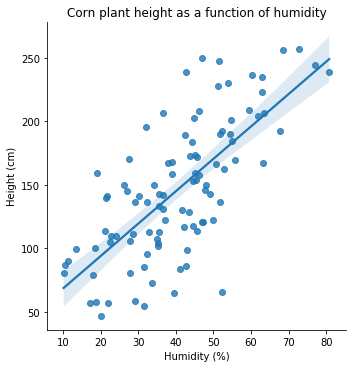

In [12]:
sns.lmplot(data=corn, x='humid', y='height')
plt.xlabel('Humidity (%)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of humidity');

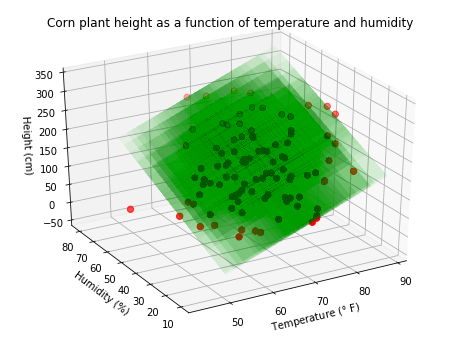

In [52]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(corn['temp'], corn['humid'], corn['height'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(corn['temp'], corn['humid'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('Temperature ($\degree$ F)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Height (cm)')
plt.title('Corn plant height as a function of temperature and humidity');

## Multicollinearity

Multicollinearity describes the correlation between distinct predictors. Why might high multicollinearity be a problem for interpreting a linear regression model?

It's problematic for statistics in an inferential mode because, if $x_1$ and $x_2$ are highly correlated with $y$ but also *with each other*, then it will be very difficult to tease apart the effects of $x_1$ on $y$ and the effects of $x_2$ on $y$. If I really want to have a good sense of the effect of $x_1$ on $y$, then I'd like to vary $x_1$ while keeping the other features constant. But if $x_1$ is highly correlated with $x_2$ then this will be a practically impossible exercise!

We will return to this topic again. For more, see [this post](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058).

**A further assumption for multiple linear regression is**:

**5. The predictors are independent.**

**How can I check for this?**
- Check the model Condition Number (see below).
- Check the correlation values.
- Compute Variance Inflation Factors ([VIFs](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)).

**What can I do if it looks like I'm violating this assumption?**

- Consider dropping offending predictors.
- We'll have much more to say about this topic in future lessons!

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [ ]:
comma_use = pd.read_csv('data/comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [ ]:
comma_use.head()

In [ ]:
comma_use.shape

In [ ]:
comma_use.dropna(inplace=True)

In [ ]:
comma_use.shape

In [ ]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
comma_trans = ohe.fit_transform(comma_use.drop('RespondentID', axis=1))

Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. See the *bottom* of [this link](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for a good explanation.

So what did the encoder do?

In [ ]:
comma_trans.todense()

In [ ]:
ohe.get_feature_names()

In [ ]:
df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
df.head()

## Multiple Regression in StatsModels

Statsmodels offers a highly descriptive report of the fit of a regression model. Let's generate a simple regression and then analyze the report!

In [ ]:
import statsmodels.api as sm

First let's try data that fit a straight line perfectly:

In [ ]:
x = np.arange(20)
y = 3*x + 1         # Note that we can do this only because x is a NumPy array!

sm.OLS(y, sm.add_constant(x)).fit().summary()

$\rightarrow$Now let's add a little noise:

In [ ]:
x = np.arange(20)
y = np.array([3*pt + 1 + gauss(mu=0, sigma=5) for pt in x])

In [ ]:
df2 = pd.DataFrame(columns=['x', 'y'])

df2['x'] = x
df2['y'] = y

In [ ]:
model = sm.formula.ols(formula='y~x', data=df2).fit()

Please note the difference between `sm.OLS()` and `sm.formula.ols()`!

In [ ]:
sm.graphics.plot_regress_exog(model, 'x', fig=plt.figure(figsize=(12, 8)))

In [ ]:
model.summary()

How do we interpret this report?

## Coefficient of Determination

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

### Adjusted $R^2$

There are some theoretical [objections](https://data.library.virginia.edu/is-r-squared-useless/) to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only *increase*! (It could hardly be that with more features I'd be able to account for *less* of the variation in the dependent variable than I could with the smaller set of features.)

One improvement is **adjusted $R^2$**: <br/> $\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

- n is the number of data points; and
- m is the number of predictors.

This can be a better indicator of the quality of a regression model. For more, see [here](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/).

Note that $R^2$ *can* be negative!

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression()

bad_pred = np.mean(y) * np.ones(len(y))
worse_pred = (np.mean(y) - 100) * np.ones(len(y))

print(r2_score(y, bad_pred))
print(r2_score(y, worse_pred))

## Other Regression Statistics

What else do we have in this report?

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; we'll talk about those later. <br/><br/>
- **coef**: These are the betas as calculated by the least-squares regression. We also have p-values and 95%-confidence intervals. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

**Many good regression diagnostics are available in** [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html). For more on statsmodels regression statistics, see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate).

## Wine Dataset

In [ ]:
wine = pd.read_csv('data/wine.csv')

wine.head()

In [ ]:
wine.info()

## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

Now: Which columns (predictors) should I choose? There are 12 predictors I could choose from For each of these predictors, I could either use it or not use it in my model, which means that there are 2^12 = 4096 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

We'll explore a few methods here. For more on feature selection, see [this post](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2).

### Correlation

In [ ]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(wine.corr());

In [ ]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.

wine.corr()['quality'].sort_values(ascending=False)

In [ ]:
# Let's choose 'alcohol' and 'density'.

wine_preds = wine[['alcohol', 'density']]
wine_target = wine['quality']

## Scaling

Before we construct a linear regression, let's *scale* our columns by z-scores. Why?

In a word, it's useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If, moreover, the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

For more on this, see [this post](https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them).

In [ ]:
wine_preds_scaled = (wine_preds - np.mean(wine_preds)) / np.std(wine_preds)

Let's try a model with our wine dataset now.

In [ ]:
predictors = sm.add_constant(wine_preds_scaled)
model = sm.OLS(wine_target, predictors).fit()
model.summary()

In [ ]:
wine_preds2 = wine[['alcohol', 'density', 'volatile acidity']]

wine_preds2_scaled = (wine_preds2 - np.mean(wine_preds2)) / np.std(wine_preds2)

In [ ]:
predictors = sm.add_constant(wine_preds2_scaled)
model = sm.OLS(np.asarray(wine_target), predictors).fit()
model.summary()

## Multiple Regression in Scikit-Learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()


# Now we'll apply it to our data by using the .fit() and .transform() methods.

ss.fit(wine_preds2)

wine_preds2_scaled = ss.transform(wine_preds2)

In [ ]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(wine_preds2_scaled, wine_target)

In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

In [ ]:
lr.intercept_

## Feature Engineering

Sometimes we can get better performance if we multiply features together. Consider the following dataset:

In [ ]:
sales = pd.read_csv('data/Advertising.csv', index_col=0)

sales.head()

We'd like to try to understand sales as a function of spending on various media (TV, radio, newspaper). We could check correlations of sales with the different features:

In [ ]:
sales.corr()['sales']

The correlation with TV spending is pretty high. But look what happens when we add a new column:

In [ ]:
sales['TV+Radio'] = sales['TV'] * sales['radio']

In [ ]:
sales.corr()['sales']['TV+Radio']

The correlation here is amazing! Let's make ourselves a plot:

In [ ]:
fig, ax = plt.subplots()
ax.scatter(sales['TV+Radio'], sales['sales']);

In practice, it's not easy to tell when such products of features will be so fruitful. Moreover, there is room for concern about violating regression's demand for feature independence. At the very least, we would probably not want to include a product *and the individual features themselves* in a final model, not if our goal is to understand what's really responsible for fluctuations in our target variable.

## Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to meaure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score. Let's go back to our wine dataset:

In [ ]:
metrics.r2_score(wine_target, lr.predict(wine_preds2_scaled))

Let's make sure this metric is properly calibrated. If we put simply $\bar{y}$ as our prediction, then we should get an $R^2$ score of *0*. And if we predict, say, $\bar{y} + 1$, then we should get a *negative* $R^2$ score.

In [ ]:
avg_quality = np.mean(wine_target)
num = len(wine_target)

metrics.r2_score(wine_target, avg_quality * np.ones(num))

In [ ]:
metrics.r2_score(wine_target, (avg_quality + 1) * np.ones(num))

In [ ]:
metrics.mean_absolute_error(wine_target, lr.predict(wine_preds2_scaled))

In [ ]:
metrics.mean_squared_error(wine_target, lr.predict(wine_preds2_scaled))

## Regression with Categorical Features: Back to the Comma Dataset

In [ ]:
comma_use.columns

In [ ]:
df.columns

In [ ]:
# We'll try to predict the first column of df: the extent to which
# the person accepts the sentence
# without the Oxford comma as more grammatically correct.

comma_target = df['x0_It\'s important for a person to be honest, kind, and loyal.']

comma_predictors = df[['x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999',
       'x9_$150,000+', 'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999']]

comma_lr = LinearRegression()

comma_lr.fit(comma_predictors, comma_target)

In [ ]:
comma_lr.score(comma_predictors, comma_target)

In [ ]:
comma_lr.coef_

In [ ]:
df.corr()['x0_It\'s important for a person to be honest, kind, and loyal.']

## Appendix 1: Recursive Feature Elimination

The idea behind recursive feature elimination is to start with all predictive features and then build down to a small set of features slowly, by eliminating the features with the lowest coefficients.

That is:
1. Start with a model with _all_ $n$ predictors;
2. find the predictor with the smallest coefficient;
3. throw that predictor out and build a model with the remining $n-1$ predictors;
4. set $n = n-1$ and repeat until $n-1$ has the value you want!

### Recursive Feature Elimination in Scikit-Learn

In [ ]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)
select = select.fit(X = wine.drop('quality', axis=1), y = wine['quality'])

select.support_

select.ranking_

Caution: RFE is probably not a good strategy if your initial dataset has many predictors. It will likely be easier to start with a *simple* model and then slowly increase its complexity. This is also good advice for when you're first getting your feet wet with `sklearn`!

## Appendix 2: Visualization of Error

In [ ]:
# Adjusting X so that the intercept term of the best-fit line will be 0
X = np.array([1.5, 3.5, 5.5])
Y = np.array([2, 9, 10])

model = LinearRegression().fit(X.reshape(-1, 1), Y)

model.coef_

In [ ]:
model.intercept_

In [ ]:
def sse(m):
    line = m*X
    err = sum(x**2 for x in [line - model.predict(X.reshape(-1, 1))])
    return sum(err)

In [ ]:
fig, ax = plt.subplots()

ms = np.linspace(0, 5, 100)
ys = [sse(m) for m in ms]

ax.plot(ms, ys);

In [ ]:
# Going 3d to plot error as a function of both m and b
from mpl_toolkits import mplot3d

def new_sse(m, x, b, y):
    """
    This function returns the sum of squared errors for
    a target y and a linear estimate mx + b.
    """
    return len(x) * metrics.mean_squared_error(y, m*x + b)

In [ ]:
# Going back to our original example
X_sample = np.array([1, 3, 5])
Y_sample = np.array([2, 9, 10])

# This should be our minimum error
new_sse(2, X_sample, 1, Y_sample)

In [ ]:
ms = np.linspace(-3, 7, 100)
bs = np.linspace(-5, 5, 100)

X_grid, Y_grid = np.meshgrid(ms, bs)

Z = np.array([[new_sse(m, X_sample, b, Y_sample) for m in ms] for b in bs])

In [ ]:
m_errs = {}
for m in ms:
    m_errs[m] = new_sse(m, X_sample, 1, Y_sample)
print(min(m_errs.values()))
for k in m_errs:
    if m_errs[k] == min(m_errs.values()):
        print(k)

In [ ]:
b_errs = {}
for b in bs:
    b_errs[b] = new_sse(2, X_sample, b, Y_sample)
print(min(b_errs.values()))
for k in b_errs:
    if b_errs[k] == min(b_errs.values()):
        print(k)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');
plt.savefig('surfacePlotSSE')

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X_grid, Y_grid, Z, 200)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');
plt.savefig('contourPlotSSE')